In [2]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



In [13]:
data_dir = pathlib.Path("/content/drive/MyDrive/TCC_DOCS/dataset_balanceado")
print(data_dir)

/content/drive/MyDrive/TCC_DOCS/dataset_balanceado


In [14]:
np.random.seed(1000)

image_shape = 100
batch_size = 100
AlexNet = Sequential()

# Primeira camada convolucional
AlexNet.add(Conv2D(filters=96, input_shape=(image_shape, image_shape, 3), kernel_size=(11, 11), strides=(4, 4), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Segunda camada convolucional
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Terceira camada convolucional
AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))

# Quarta camada convolucional
AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))

# Quinta camada convolucional
AlexNet.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Camadas densas
AlexNet.add(Flatten())
AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))

AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))

AlexNet.add(Dense(1000))
AlexNet.add(Activation('relu'))

# Camada de saída
AlexNet.add(Dense(5))
AlexNet.add(Activation('softmax'))

# Resumo do modelo
AlexNet.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 25, 25, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 25, 25, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 7, 7, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 7, 7, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │           5,005 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 41,411,829 (157.97 MB)

 Trainable params: 41,411,829 (157.97 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    label_mode="categorical",
    image_size=(image_shape, image_shape),
    batch_size=batch_size
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 6544 files belonging to 5 classes.
Found 6544 files belonging to 5 classes.
Using 1308 files for validation.
Found 6544 files belonging to 5 classes.
['basal', 'mela', 'nev', 'seborreheic_keratosis', 'squamous_cellcarcinoma']


In [16]:
for image_batch, labels_batch in train_ds:
  train_img = image_batch
  train_labels = labels_batch
  break
for image_batch, labels_batch in val_ds:
  val_img = image_batch
  val_labels = labels_batch
  break
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  test_img = image_batch
  test_labels = labels_batch
  break

(100, 100, 100, 3)


In [17]:
AlexNet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [18]:
epochs = 50



history = AlexNet.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
    )

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 396ms/step - accuracy: 0.2212 - loss: 179.3414 - val_accuracy: 0.2347 - val_loss: 1.5941
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 357ms/step - accuracy: 0.2675 - loss: 1.5479 - val_accuracy: 0.3165 - val_loss: 1.4874
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 360ms/step - accuracy: 0.3202 - loss: 1.4803 - val_accuracy: 0.3899 - val_loss: 1.4418
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 358ms/step - accuracy: 0.3220 - loss: 1.4780 - val_accuracy: 0.4052 - val_loss: 1.3567
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 357ms/step - accuracy: 0.3671 - loss: 1.4218 - val_accuracy: 0.4258 - val_loss: 1.3110
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 357ms/step - accuracy: 0.3968 - loss: 1.3801 - val_accuracy: 0.3784 - val_loss: 1.7471
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 356ms/step - accuracy: 0.3918 - loss: 1.4017 - val_accuracy: 0.4442 - val_loss: 1.3162
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 357ms/step - accuracy: 0.4446 - loss: 1.3004 - val_ac

In [19]:
loss, acc = AlexNet.evaluate(test_ds)
print("Accuracy", acc)

66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - accuracy: 0.8552 - loss: 0.4118
Accuracy 0.8649144172668457


In [20]:
# prompt: imprima a matriz de confusao do modelo treinado

from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions for the test set
y_pred = np.argmax(AlexNet.predict(test_ds), axis=1)

# Get true labels for the test set
y_true = []
for images, labels in test_ds:
  y_true.extend(np.argmax(labels.numpy(), axis=1))

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 293ms/step
Confusion Matrix:
[[264 228 284 253 269]
 [252 223 237 306 297]
 [261 264 256 272 272]
 [271 247 271 245 271]
 [260 244 270 268 259]]


66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step


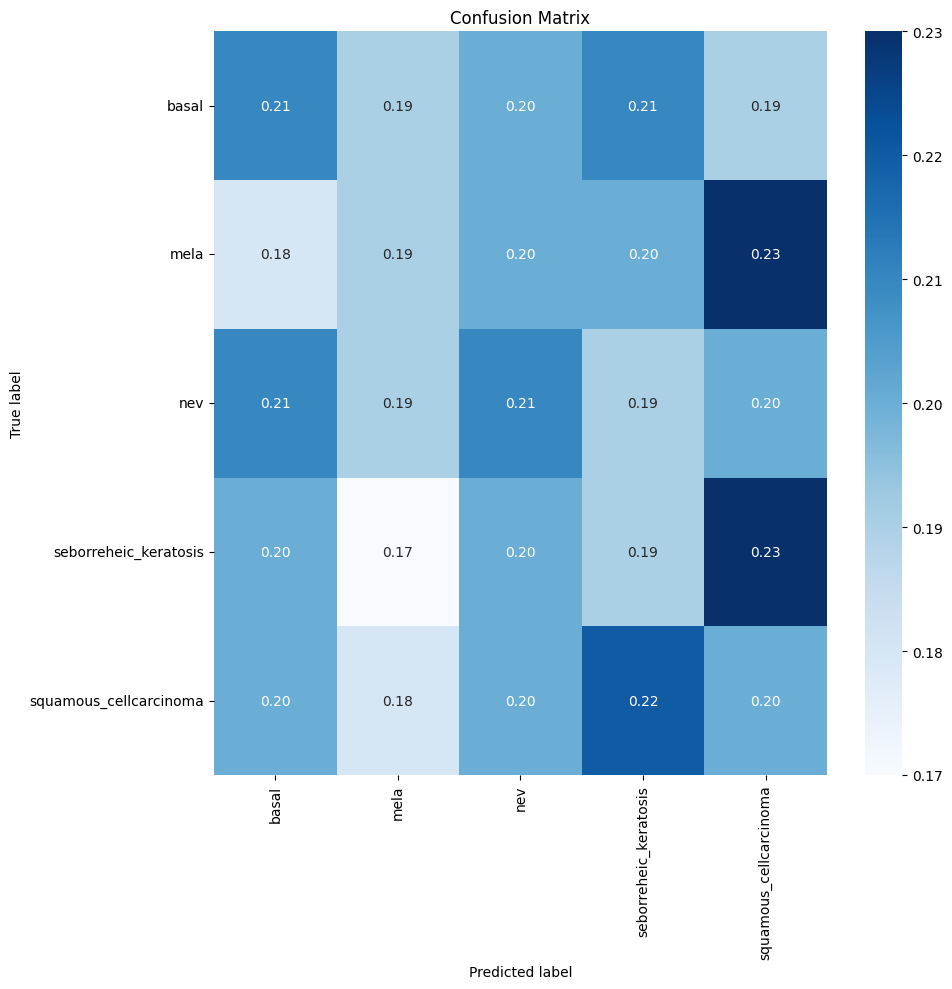

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtenha previsões do conjunto de teste
y_pred = np.argmax(AlexNet.predict(test_ds), axis=1)

# Obtenha os rótulos verdadeiros do conjunto de teste
y_true = []
for images, labels in test_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))

# Converta listas para arrays numpy
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calcule a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Normalize a matriz de confusão
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm = np.around(cm_norm, decimals=2)

# Crie um DataFrame para a matriz de confusão
cm_df = pd.DataFrame(cm_norm, index=class_names, columns=class_names)

# Visualize a matriz de confusão
plt.figure(figsize=(10, 10))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues, fmt='.2f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()